<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/unit_2_sprint_3_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving pulsar_stars.csv to pulsar_stars.csv


In [3]:
#imported dataset with a binary classifier which is very unbalanced
import pandas as pd
stars = pd.read_csv('pulsar_stars.csv')
stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
#seeing correlation with target clasw - excess kurtosis of integrated profile and skewness  of integrated profile have highest correlation
stars.corr()[-1:]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.0


In [39]:
#chekcing balance of target class - it's 91 to 9 so a good baseline would be to assume all 0 then you would get 91% accuracy
#so we have to beat that.  we can checking precision/accuracy later in a confusion matrix
stars['target_class'].value_counts(normalize=True)

0    0.908426
1    0.091574
Name: target_class, dtype: float64

In [10]:
#no mossing data
stars.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [13]:
stars.copy().drop('target_class',axis=1).columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

features=stars.copy().drop('target_class',axis=1).columns
target=['target_class']

preprocessor = make_pipeline(StandardScaler()) #just practising using pipeline
X = preprocessor.fit_transform(stars[features])
X = pd.DataFrame(X, columns=features)
y = stars[target]

In [0]:
#taking function from lecture notes to make holdout group
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [0]:
X_train, X_val, X_test, y_train, y_val, y_test=train_validation_test_split(X, y, 0.7, 0.15, 0.15)

In [0]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

def star_trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeClassifier(max_depth=max_depth), 
              RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators), 
              XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)]
    for model in models:
      name = model.__class__.__name__
      model.fit(X_train, y_train)
      ax = stars.plot(' Excess kurtosis of the integrated profile', 'target_class', kind='scatter', title=name)
      ax.step(X_train, model.predict(X_train), where='mid')
      plt.show()
        

In [0]:
#these charts were not much use in this case
interact(star_trees, max_depth=(1,6,1), n_estimators=(10,40,10));

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

y_proba_ensemble=[]
for model in models:
    print(model, '\n')
    threshold = 0.5
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')
    y_pred_proba=cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, 
                                 method='predict_proba')[:,1]
    y_pred=y_pred_proba>threshold


    cm=pd.DataFrame(confusion_matrix(y_train, y_pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
    print(cm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.9777296788028222 
 

                 Predicted Negative  Predicted Positive
Actual Negative               11321                  58
Actual Positive                 221                 928
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.9763724887745451 
 

                 Predicted Negative  Predicted Positive
Actual Negative               11277                 102
Act

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

Cross-Validation Accuracy: 0.9769313392267505 
 

                 Predicted Negative  Predicted Positive
Actual Negative               11319                  60
Actual Positive                 229                 920
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

Cross-Validation Accuracy: 0.9784479549400927 
 

                 Predicted Negative  Predicted Positive
Actual Negative               11311                  68
Actual Positive                 202                 947
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1) 

Cross-Validation Accuracy: 0.9788470609833524 
 

                 Predicted Negative  Predicted Positive
Actual Negative               11310                  69
Actual Positive                 196                 953


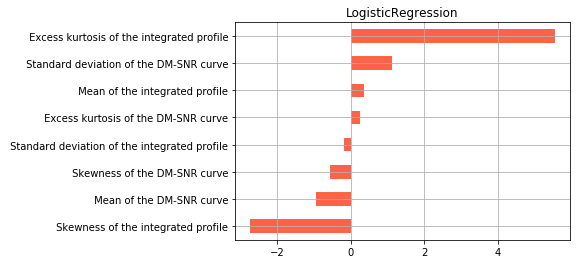

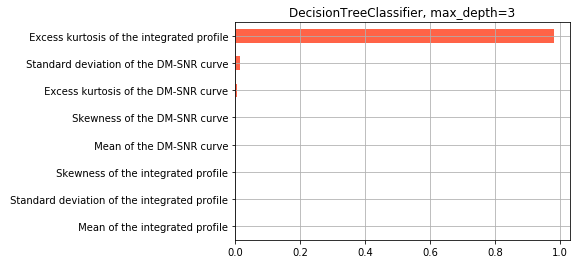

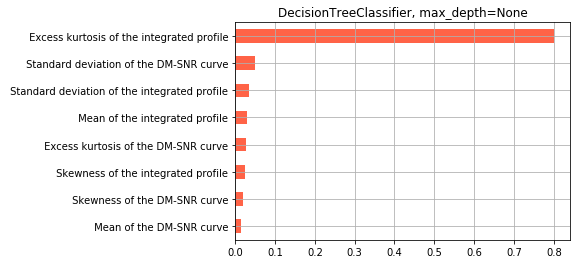

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


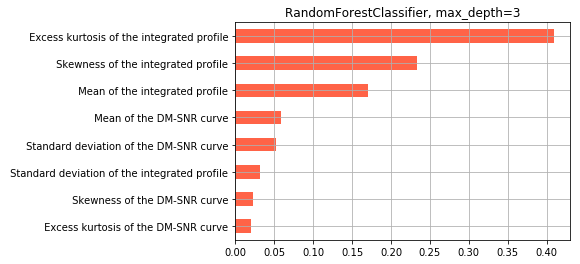

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


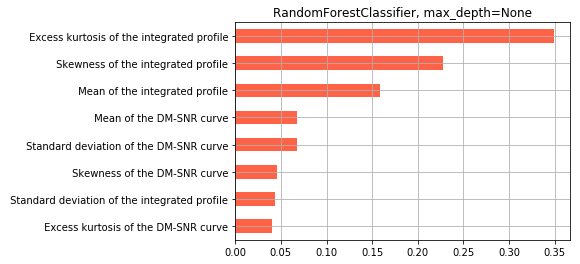

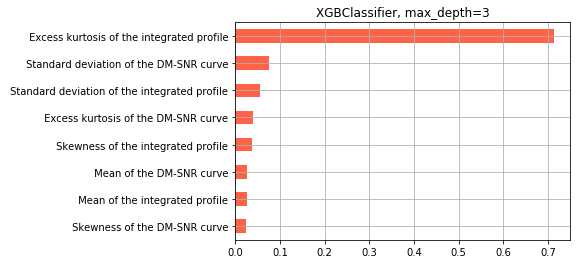

In [51]:
#as expected the random forrest classifier was the best
#now let's look at feature importance
for model in models:
    name = model.__class__.__name__
    model.fit(X_train, y_train)
    if name == 'LogisticRegression':
        coefficients = pd.Series(model.coef_[0], X_train.columns)
        coefficients.sort_values().plot.barh(color='#FF6347', title=name)
        plt.grid()
        plt.show()
    else:
        importances = pd.Series(model.feature_importances_, X_train.columns)
        title = f'{name}, max_depth={model.max_depth}'
        importances.sort_values().plot.barh(color='#FF6347', title=title)
        plt.grid()
        plt.show()

In [0]:
#as expected from looking at the correlation, excess kutosis is the best

In [55]:
#messign around with this function
def star_bagging(max_depth=1, n_estimators=1):
    predicteds = []
    for i in range(n_estimators):
        title = f'Tree {i+1}'
        bootstrap_sample = stars.sample(n=len(stars), replace=True)
        #preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer())
        bootstrap_X = preprocessor.fit_transform(bootstrap_sample[[' Excess kurtosis of the integrated profile', ' Standard deviation of the DM-SNR curve']])
        bootstrap_y = bootstrap_sample['target_class']
        tree = DecisionTreeClassifier(max_depth=max_depth)
        tree.fit(bootstrap_X, bootstrap_y)
        predicted = viz2D(tree, X, feature1=' Excess kurtosis of the integrated profile', feature2=' Standard deviation of the DM-SNR curve', title=title)
        predicteds.append(predicted)
    
    ensembled = np.vstack(predicteds).mean(axis=0)
    title = f'Ensemble of {n_estimators} trees, with max_depth={max_depth}'
    plt.imshow(ensembled.reshape(100, 100), cmap='viridis')
    plt.title(title)
    plt.xlabel(' Excess kurtosis of the integrated profile')
    plt.ylabel(' Standard deviation of the DM-SNR curve')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
        
interact(star_bagging, max_depth=(1,6,1), n_estimators=(2,5,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=2, descriptio…

In [0]:

def viz2D(fitted_model, X, feature1, feature2, num=100, title=''):
    x1 = np.linspace(X[feature1].min(), X[feature1].max(), num)
    x2 = np.linspace(X[feature2].min(), X[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    
    plt.imshow(predicted.reshape(num, num), cmap='viridis')
    plt.title(title)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
    return predicted

In [64]:
#now focusing on XGBClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
depths=[3,4,5] 
n_estimator=[75,200,400]
booster=['gbtree', 'gblinear', 'dart']
#thresholds=[0.5,0.6,0.7]
param_grid = [{'max_depth': [3,4,5], 'n_estimators': [75,200,400],'booster': ['gbtree', 'gblinear', 'dart']}]
scores = ['accuracy','precision', 'recall']
 
for score in scores:
  xgb=GridSearchCV(XGBClassifier(n_jobs=-1,random_state=42),param_grid,scoring=score)
  xgb.fit(X_train,y_train)
  print("Best parameters set found on grid:")
  print()
  print(xgb.best_params_)


Best parameters set found on development set:

{'booster': 'gbtree', 'max_depth': 3, 'n_estimators': 200}
Best parameters set found on development set:

{'booster': 'gblinear', 'max_depth': 3, 'n_estimators': 75}
Best parameters set found on development set:

{'booster': 'gbtree', 'max_depth': 3, 'n_estimators': 200}


Best parameters set found on development set:

{'booster': 'gbtree', 'max_depth': 3, 'n_estimators': 200}
Best parameters set found on development set:

{'booster': 'gblinear', 'max_depth': 3, 'n_estimators': 75}
Best parameters set found on development set:

{'booster': 'gbtree', 'max_depth': 3, 'n_estimators': 200}

In [65]:
#so max depth 3 seemed to always be best, while 200 maximized for accuracy and recall, while gb tree was often the best booster

xgb_tuned=XGBClassifier(booster='gbtree',max_depth=3, n_estimators=200, n_jobs=-1, random_state=42)
xgb_tuned.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [72]:
#so decent improvement in accuracy from below 98 to 98.4
xgb_tuned.score(X_train,y_train), xgb_tuned.score(X_test,y_test)

(0.9851532567049809, 0.9839851024208566)